## compute price return using SPY

### + verify daily percent return mean is 0

### + check how mean return varies as period is increased from day 1 to 120.

### + verify log return matches well with percent return


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# get historical daily price for SPY
symbol = 'SPY'
tick = yf.Ticker(symbol)
history = tick.history(period="max")

### + verify daily percent return mean is 0

In [3]:
changes = history.Close.pct_change(1).dropna().values
print(np.mean(changes))

0.00044109449579917293


### + check how mean return varies as period is increased from day 1 to 120.

,period,mymean,mystd
0,1,0.000441,0.011911
1,10,0.004220,0.032208
2,20,0.008431,0.044869
3,30,0.012548,0.053841
4,40,0.016730,0.061383
5,50,0.020934,0.068259
6,60,0.025113,0.074266
7,70,0.029291,0.079890
8,80,0.033502,0.085597
9,90,0.037679,0.091094


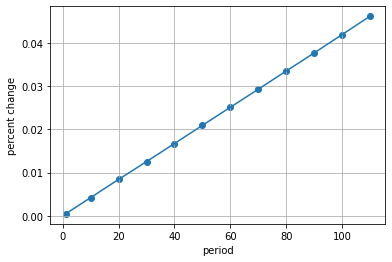

In [4]:
mylist = []
for period in np.arange(0,120,10):
    period = 1 if period == 0 else period
    changes = history.Close.pct_change(period).dropna().values
    item=dict(period=period,mymean=np.mean(changes),mystd=np.std(changes))
    mylist.append(item)
df = pd.DataFrame(mylist)

plt.plot(df.period,df.mymean)
plt.scatter(df.period,df.mymean)
plt.grid(True)
plt.xlabel('period')
plt.ylabel('percent change')

df

#### When selling puts & calls 45 DTE, historically, better to be a bit far out on the call side given SPY mean change over 30 to 50 days range from 1 to 2%

### + verify log return matches well with percent return

In [5]:
# log return computation
changes = history.Close.pct_change(1).dropna().values
df=pd.DataFrame()
df['price'] = history.Close
df['pct_chg'] = df.price.pct_change()
df['log_ret'] = np.log(df.price) - np.log(df.price.shift(1))

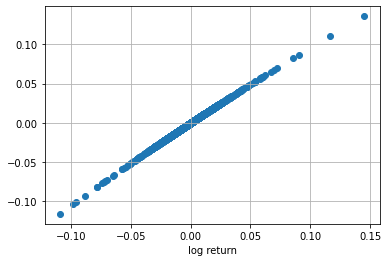

In [6]:
# percent change, veresus log return
plt.scatter(df.iloc[1:].pct_chg,df.iloc[1:].log_ret)
plt.xlabel('percent change')
plt.xlabel('log return')
plt.grid(True)

### + check distribution of 30-day percent change 

mean 0.012548187620858815
1993-01-29 00:00:00 2020-10-23 00:00:00


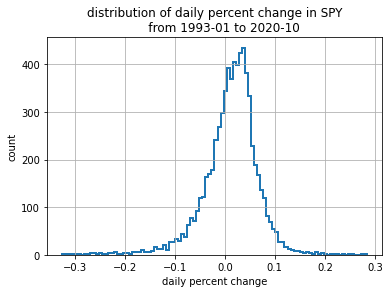

In [7]:
subhistory = history.copy()
changes = subhistory.Close.pct_change(30).dropna().values
print('mean',np.mean(changes))
_=plt.hist(changes,bins=100,histtype='step',linewidth=2)
plt.xlabel('daily percent change')
plt.ylabel('count')
plt.title(f'''distribution of daily percent change in SPY\n \
    from {np.min(subhistory.index).strftime("%Y-%m")} to {np.max(subhistory.index).strftime("%Y-%m")}'''
 )
plt.grid(True)
print(np.min(subhistory.index),np.max(subhistory.index))

mean 0.059711222089598025 sd 0.04669181585367756
2020-03-24 00:00:00 2020-10-23 00:00:00


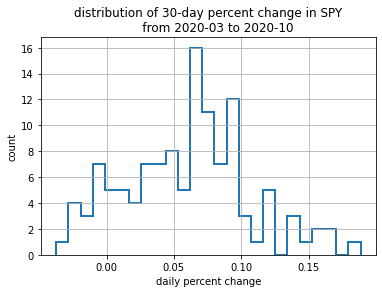

In [8]:
subhistory = history.copy().iloc[-150:]
changes = subhistory.Close.pct_change(30).dropna().values
print('mean',np.mean(changes),'sd',np.std(changes))
_=plt.hist(changes,bins=25,histtype='step',linewidth=2)
plt.xlabel('daily percent change')
plt.ylabel('count')
plt.title(f'''distribution of 30-day percent change in SPY\n \
    from {np.min(subhistory.index).strftime("%Y-%m")} to {np.max(subhistory.index).strftime("%Y-%m")}'''
 )
plt.grid(True)
print(np.min(subhistory.index),np.max(subhistory.index))

### ^^^  the positive skew from Mar to Oct 2020 is why you are loosing money if you are sticking to a delta neutral portfolio